In [1]:
%load_ext jupyter_black

# Interpolación y ajuste de curvas

Frecuentemente nos enfrentamos a este problema

* dados $n+1$ datos $(x_i,y_i)$ con $i=0,1,\ldots ,n$, estima $y(x)$,
cuando tenemos que analizar datos de observaciones experimentales o de cálculos numéricos.

* **Interpolación:** construir una curva que *pase por los datos*. Entonces estamos asumiendo que los datos son precisos.
* **Ajuste a una curva:** construir una curva que *aproxime los datos*. Entonces estamos asumiendo que los datos tienen **ruido** (por ejemplo el debido a los errores en la medición). La curva no necesariamente pasa por los datos.


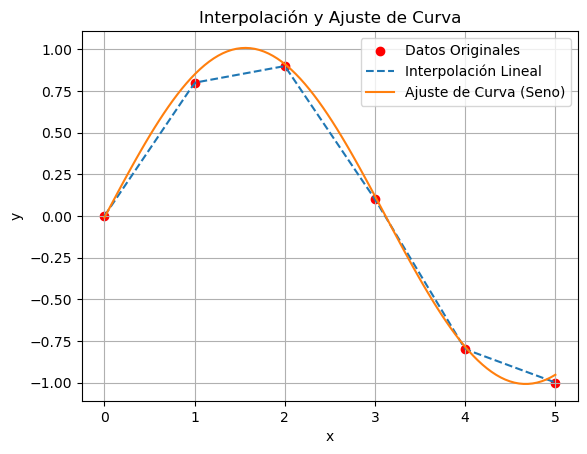

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

# Datos de ejemplo
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 0.8, 0.9, 0.1, -0.8, -1])

# Interpolación lineal
interpolacion_lineal = interp1d(x, y, kind="linear")
x_interpolado = np.linspace(0, 5, 100)
y_interpolado_lineal = interpolacion_lineal(x_interpolado)


# Ajustar función sinusoidal
def func_seno(x, a, b, c):
    return a * np.sin(b * x + c)


parametros, _ = curve_fit(func_seno, x, y)
y_ajustado = func_seno(x_interpolado, *parametros)

# Graficar los datos originales
plt.scatter(x, y, label="Datos Originales", color="red")

# Graficar la interpolación lineal
plt.plot(
    x_interpolado, y_interpolado_lineal, label="Interpolación Lineal", linestyle="--"
)

# Graficar el ajuste de curva
plt.plot(x_interpolado, y_ajustado, label="Ajuste de Curva (Seno)", linestyle="-")


plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolación y Ajuste de Curva")
plt.legend()
plt.grid(True)
plt.show()

**Interpolación:**
1. Método de Lagrange
2. Método de Newton

**Ajuste**
1. Método de mínimos cuadrados

# Método de Lagrange

Se busca un polinomio que pase por cada uno de los puntos de la función, a partir de las diferencias divididas:

\begin{equation*}
f(x_i - x_{i-1}) = \frac{f(x_i)-f(x_{i-1})}{x_i-x_{i-1}}
\end{equation*}

<center> <div> <img src="fig/derivada.jpg" alt="Drawing" style="width: 500px;"/></div>



Se propone un polinomio de la forma:

\begin{equation*}
P_n(x)= \sum_{i=0}^{n}  A_i(x-x_1)(x-x_2)\cdots(x-x_{n-1}) 
\end{equation*}

que es un polinomio de grado n−1 y los coeficientes $A_i$ deben determinarse de tal manera
que el polinomio pase por todos y cada uno de los puntos de la función tabular.

Evaluando en x = $x_0$ y despejando $A_0$

\begin{equation*}
A_0=\frac{P_0}{(x_0-x_1)(x_0-x_2)\cdots(x_0-x_{n-1})} 
\end{equation*}

asi hasta el punto x = $x_n$


\begin{equation*}
A_n=\frac{P_n}{(x_n-x_1)(x_n-x_2)\cdots(x_n-x_{n-1})} 
\end{equation*}

y entonces el polinomio $P_n(x)$ es:

\begin{equation*}
P_n(x)=\frac{P_0(x-x_2)\cdots(x-x_{n-1})}{(x_0-x_1)(x_0-x_2)\cdots(x_0-x_{n-1})}+\cdots+\frac{P_n(x-x_2)\cdots(x-x_{n-1})}{(x_n-x_1)(x_n-x_2)\cdots(x_n-x_{n-1})} 
\end{equation*}

que es la expresión de Lagrange:

\begin{equation*}
P_n(x) = \sum_{i=0}^{n} y_i \ell_i(x) = \sum_{i=0}^{n} y_i \prod_{j(\neq i) = 0}^n \frac{x-x_j}{x_i-x_j},~~~~~i=0,1,\ldots ,n.
\end{equation*}

donde $\ell_i(x)$ son **funciones cardinales** 

Si $n=1$, $P_1(x) = y_0 \ell_0(x)+y_1 \ell_1(x)$ es una recta, donde

\begin{align*}
\ell_0(x) = \frac{x-x_1}{x_0-x_1} && \ell_1(x) = \frac{x-x_0}{x_1-x_0}.
\end{align*}

Si $n=2$, $P_2(x) = y_0 \ell_0(x)+y_1 \ell_1(x)+y_2 \ell_2(x)$ es una parábola, donde

\begin{align*}
\ell_0(x) &= \frac{x-x_1}{x_0-x_1}\frac{x-x_2}{x_0-x_2}, \\ 
\ell_1(x) &= \frac{x-x_0}{x_1-x_0}\frac{x-x_2}{x_1-x_2}, \\
\ell_2(x) &= \frac{x-x_0}{x_2-x_0}\frac{x-x_1}{x_2-x_1}. 
\end{align*}


Las funciones cardinales tienen la propiedad de

\begin{align*}
\ell_i(x_j) = \Biggl\{\begin{array}{cc}
0 & si ~i = j \\
1 & si ~i\neq j 
\end{array} \Biggr\} = \delta_{ij}
\end{align*}

Para mostrar que los polinomios pasan por los datos, podemos sustituir $x=x_j$ en $P_n$ y luego usar sus propiedades, para tener

\begin{equation*}
P_n(x_j) = \sum_{i=0}^{n} y_i \ell_i(x_j) = \sum_{i=0}^{n} y_i \delta_{ij} = y_j.
\end{equation*}

Tambien se puede mostrar que el error en la interpolación con polinomios es

\begin{equation*}
f(x) - P_n(x) = \frac{(x-x_0)(x-x_1)\cdots(x-x_n)}{(n+1)!}f^{(n+1)}(\xi),
\end{equation*}

donde $\xi \in (x_0,x_n)$, asi que cuanto más lejos este un dato de $x$, más contribuye al error en $x$.


# Ejemplo 1: Método de Lagrange

El método de Lagrange también puede ser utilizada para datos que no están igualmente espaciados


Los polinomios básicos de Lagrange ($\ell_i(x)$) se definen como:
$$
\ell_i(x) = \prod_{\substack{0 \leq j \leq n \ j \neq i}} \frac{x - x_j}{x_i - x_j}
$$

Si x = [0, 20, 40, 60] :

$$
\ell_0(x) = \frac{(x - 20)(x - 40)(x - 60)}{(0 - 20)(0 - 40)(0 - 60)} \\

\ell_1(x) = \frac{(x - 0)(x - 40)(x - 60)}{(20 - 0)(20 - 40)(20 - 60)} \\
\ell_2(x) = \frac{(x - 0)(x - 20)(x - 60)}{(40 - 0)(40 - 20)(40 - 60)} \\
\ell_3(x) = \frac{(x - 0)(x - 20)(x - 40)}{(60 - 0)(60 - 20)(60 - 40)} 
$$

Cálculo de ($\ell_i(10)$)

$$
\ell_0(10) = \frac{(10 - 20)(10 - 40)(10 - 60)}{(0 - 20)(0 - 40)(0 - 60)} = \\ \frac{(-10)(-30)(-50)}{(-20)(-40)(-60)} = \\ \frac{-15000}{48000} = -\frac{5}{16} \\

\ell_1(10) = \frac{(10 - 0)(10 - 40)(10 - 60)}{(20 - 0)(20 - 40)(20 - 60)} =\\ \frac{(10)(-30)(-50)}{(20)(-20)(-40)} =\\ \frac{15000}{16000} = \frac{15}{16} \\

\ell_2(10) = \frac{(10 - 0)(10 - 20)(10 - 60)}{(40 - 0)(40 - 20)(40 - 60)} =\\ \frac{(10)(-10)(-50)}{(40)(20)(-20)} =\\ \frac{5000}{-16000} = -\frac{5}{16}\\

\ell_3(10) = \frac{(10 - 0)(10 - 20)(10 - 40)}{(60 - 0)(60 - 20)(60 - 40)} =\\ \frac{(10)(-10)(-30)}{(60)(40)(20)} = \\\frac{3000}{48000} = \frac{1}{16}\\
$$

Cálculo del Valor Interpolado ( $y_p$ )

$$
y_p = \sum_{i=0}^{3} y_i \ell_i(10)\\

y_p = 26.0 \cdot \ell_0(10) + 48.6 \cdot \ell_1(10) + 61.6 \cdot \ell_2(10) + 71.2 \cdot \ell_3(10)\\

y_p = 26.0 \cdot \left(-\frac{5}{16}\right) + 48.6 \cdot \left(\frac{15}{16}\right) + 61.6 \cdot \left(-\frac{5}{16}\right) + 71.2 \cdot \left(\frac{1}{16}\right)\\

y_p = 38.9\\


$$


### Código:

In [3]:
# Definir los puntos
x = [0, 20, 40, 60]
y = [26.0, 48.6, 61.6, 71.2]
m = len(x)
n = m - 1

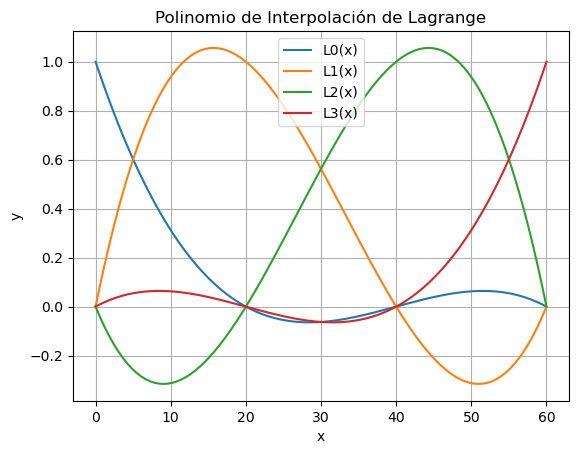

In [4]:
# Función para calcular los polinomios básicos de Lagrange
def lagrange_basis(xp, x_points, i):
    L_i = 1
    for j in range(len(x_points)):
        if j != i:
            L_i *= (xp - x_points[j]) / (x_points[i] - x_points[j])
    return L_i


# Crear puntos para la interpolación
x_interpolado = np.linspace(min(x), max(x), 100)

# Graficar los polinomios básicos de Lagrange
for i in range(n + 1):
    L_values = [lagrange_basis(x_val, x, i) for x_val in x_interpolado]
    plt.plot(x_interpolado, L_values, label=f"L{i}(x)")
# Añadir etiquetas y leyenda
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polinomio de Interpolación de Lagrange")
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [5]:
def lagrange_interpolation(xp, x_points, y_points):
    yp = 0
    for i in range(len(x_points)):
        yp += y_points[i] * lagrange_basis(xp, x_points, i)
    return yp

In [6]:
# Solicitar el valor de x para interpolar
xp = float(input("Enter x: "))
yp = lagrange_interpolation(xp, x, y)
print("For x = %.1f, y = %.1f" % (xp, yp))

For x = 10.0, y = 38.9


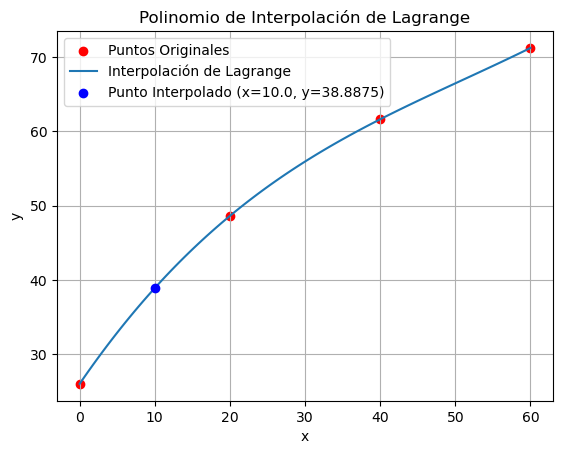

In [7]:
# Crear puntos para la interpolación
x_interpolado = np.linspace(min(x), max(x), 100)
y_interpolado = [lagrange_interpolation(x_val, x, y) for x_val in x_interpolado]
# Graficar los puntos originales
plt.scatter(x, y, label="Puntos Originales", color="red")
# Graficar el polinomio de interpolación de Lagrange
plt.plot(x_interpolado, y_interpolado, label="Interpolación de Lagrange", linestyle="-")
# Graficar los puntos de interpolación
plt.scatter(xp, yp, label=f"Punto Interpolado (x={xp}, y={yp})", color="blue", zorder=5)


# Añadir etiquetas y leyenda
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polinomio de Interpolación de Lagrange")
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

### Función de Interpolación de Lagrange

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp


def lagrange_1(x_points, y_points, xp):
    """
    Calcula y grafica el polinomio de interpolación de Lagrange.

    Parámetros:
    x_points (list or array): Puntos en el eje x.
    y_points (list or array): Puntos en el eje y.
    xp (float): Punto en el que se desea interpolar.

    Retorna:
    yp (float): Valor interpolado en xp.
    """
    m = len(x_points)
    n = m - 1
    # Definir la variable simbólica
    x = sp.symbols("x")

    # Función para calcular los polinomios básicos de Lagrange
    def lagrange_basis(xp, x_points, i):
        L_i = 1
        for j in range(len(x_points)):
            if j != i:
                L_i *= (xp - x_points[j]) / (x_points[i] - x_points[j])
        return L_i

    # Función para calcular el polinomio de Lagrange
    def lagrange_interpolation(xp, x_points, y_points):
        yp = 0
        for i in range(len(x_points)):
            yp += y_points[i] * lagrange_basis(xp, x_points, i)
        return yp

    # Calcular el valor interpolado
    yp = lagrange_interpolation(xp, x_points, y_points)
    print("For x = %.1f, y = %.1f" % (xp, yp))

    # Crear puntos para la interpolación
    x_interpolado = np.linspace(min(x_points), max(x_points), 100)
    y_interpolado = [
        lagrange_interpolation(x_val, x_points, y_points) for x_val in x_interpolado
    ]

    # Graficar los puntos originales
    plt.scatter(x_points, y_points, label="Puntos Originales", color="red")

    # Graficar el polinomio de interpolación de Lagrange
    plt.plot(
        x_interpolado, y_interpolado, label="Interpolación de Lagrange", linestyle="-"
    )

    # Graficar el valor interpolado
    plt.scatter(xp, yp, color="blue", zorder=5)
    plt.text(xp, yp, f"({xp:.1f}, {yp:.1f})", fontsize=12, verticalalignment="bottom")

    # Añadir etiquetas y leyenda
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Polinomio de Interpolación de Lagrange")
    plt.legend()
    plt.grid(True)

    # Mostrar la gráfica
    plt.show()

    # Construir el polinomio de interpolación simbólicamente
    polinomio = 0
    for i in range(len(x_points)):
        term = y_points[i]
        for j in range(len(x_points)):
            if j != i:
                term *= (x - x_points[j]) / (x_points[i] - x_points[j])
        polinomio += term

    # Simplificar el polinomio
    polinomio_simplificado = sp.simplify(polinomio)

    # Imprimir el polinomio de interpolación
    print("Polinomio de Interpolación de Lagrange:")
    print(f"y(x) = {polinomio}")
    print("\nPolinomio Simplificado:")
    print(f"y(x) = {polinomio_simplificado}")

    return yp

For x = 10.0, y = 38.9


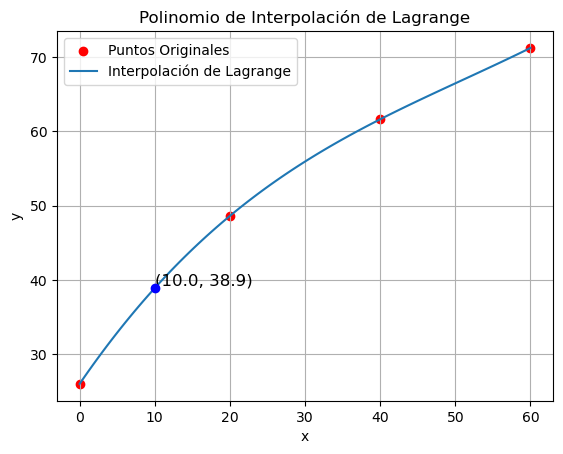

Polinomio de Interpolación de Lagrange:
y(x) = 2.43*x*(3/2 - x/40)*(2 - x/20) + 1.54*x*(3 - x/20)*(x/20 - 1) + 1.18666666666667*x*(x/40 - 1/2)*(x/20 - 2) + (1 - x/40)*(1 - x/60)*(26.0 - 1.3*x)

Polinomio Simplificado:
y(x) = 0.000129166666666668*x**3 - 0.0197500000000001*x**2 + 1.47333333333334*x + 26.0


In [9]:
try:
    x_points = [0, 20, 40, 60]
    y_points = [26.0, 48.6, 61.6, 71.2]
    xp = float(input("Enter x: "))
    lagrange_1(x_points, y_points, xp)
except ValueError:
    print("Please insert a valid number")

           3           2
0.0001292 x - 0.01975 x + 1.473 x + 26
Para x= 10 y= 38.8875


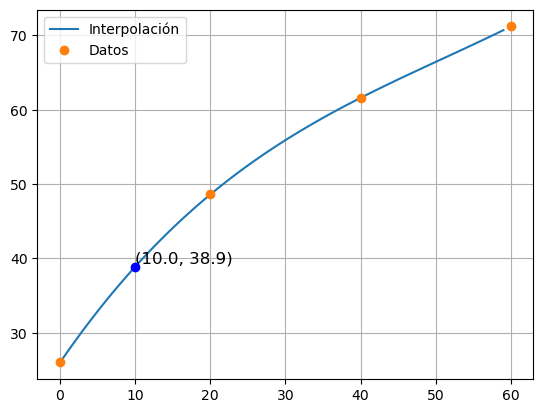

In [10]:
# Método de Lagrange con scipy
from scipy.interpolate import lagrange

L = lagrange(x_points, y_points)


x1 = np.arange(0, 60, 1)
xp = 10
yp = L(xp)
print(L)
print("Para x=", xp, "y=", yp)
# graficar valor interpolado

plt.plot(x1, L(x1), label="Interpolación")
plt.plot(x, y, "o", label="Datos")
# Graficar el valor interpolado
plt.scatter(xp, yp, color="blue", zorder=5)
plt.text(xp, yp, f"({xp:.1f}, {yp:.1f})", fontsize=12, verticalalignment="bottom")


plt.legend()
plt.grid()
plt.show()

# Ejemplo 2: 

Usando el método de interpolación de Lagrange,

1. Código visto en clase
2. Función de scipy

encuentre el valor de relación de expansión correspondiente a un peso de $5.5$ libras dentro de una lista de valores de tensiones de prueba: 

| Peso (lb) | Expansión |
| --- | --- |
| 2.4 | 0.101 |  
| 5.1 | 0.128 |  
| 7.0 | 0.241 |  
| 8.5 | 0.403 |
| 9.7 | 0.677 |